In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Any, Union

IN_CSV_DATA = Path().cwd().parent.parent / "data/2_loaded"
OUT_CSV_DATA = Path().cwd().parent.parent / "data/3_feature_engineered"

In [2]:
# Load the summary  for reference later
df_summary = pd.read_csv(IN_CSV_DATA/'summary/ride_summary_good.csv')
df_summary['start_date'] = pd.to_datetime(df_summary['start_date'])
df_summary['year'] = df_summary['start_date'].dt.year
df_summary['month'] = df_summary['start_date'].dt.month
df_summary['month_name'] = df_summary['start_date'].dt.month_name()
df_summary['start_time'] = pd.to_timedelta(df_summary['start_time'])
df_summary['end_time'] = pd.to_timedelta(df_summary['end_time'])

## Handle categorical variables
month_order = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
df_summary['month_name'] = pd.Categorical(df_summary['month_name'] , categories=month_order.keys(), ordered=True)

In [3]:
# Filter out years 2018, and 2025
df_summary = df_summary.loc[~df_summary['year'].isin([2018,2025]),:].reset_index(drop=True)

In [4]:
df_summary.columns

Index(['ride_id', 'start_date', 'start_time', 'end_time', 'biker_weight_lbs',
       'bike_weight', 'bag_weight', 'avg_speed', 'avg_cruising_speed',
       'total_ride_time_sec', 'total_moving_time_sec', 'total_distance_mi',
       'total_ascent_ft', 'total_descent_ft', 'avg_heart_rate', 'avg_power',
       'avg_cadence', 'avg_ambient_temp_F', 'best_power_4s', 'best_power_5s',
       'best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
       'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m',
       'best_power_6m', 'best_power_10m', 'best_power_20m', 'best_power_30m',
       'best_power_40m', 'best_power_1h', 'best_power_2h', 'year', 'month',
       'month_name'],
      dtype='object')

In [5]:
cols_of_interest = ['ride_id','start_date','start_time','end_time','total_distance_mi','avg_speed','avg_cruising_speed',
                    'total_ride_time_sec','total_moving_time_sec','total_ascent_ft','total_descent_ft','year','month_name']
power_cols = ['best_power_4s', 'best_power_5s','best_power_10s', 'best_power_20s', 'best_power_30s', 'best_power_1m',
            'best_power_2m', 'best_power_3m', 'best_power_4m', 'best_power_5m','best_power_6m', 'best_power_10m', 
            'best_power_20m', 'best_power_30m','best_power_40m', 'best_power_1h', 'best_power_2h']
cols_of_interest += power_cols
df_summary = df_summary.loc[:, cols_of_interest]

for col in power_cols:
    df_summary[col] = df_summary[col].fillna(0.0) # for the power columns, fill the nulls with zeros

In [6]:
df_summary.head()

,ride_id,start_date,start_time,end_time,total_distance_mi,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_ascent_ft,total_descent_ft,year,month_name,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h
0,0x5ccb413c,2019-05-02,0 days 19:13:00,0 days 19:53:00,8.865922,13.784195,14.574504,2401.0,2143.0,300.5396,300.5396,2019,May,485.282271,481.991827,462.283537,412.144319,391.244346,314.816769,209.581472,186.631718,179.636006,157.569641,155.009664,142.368486,134.442850,130.264839,0.000000,0.0,0.0
1,0x5cccc63c,2019-05-03,0 days 22:52:44,0 days 23:53:54,9.516836,11.228317,12.081964,3671.0,2725.0,333.3496,280.1974,2019,May,432.549324,425.735809,389.502414,330.267900,299.166732,225.907473,143.793900,147.597113,129.794118,118.283785,115.819729,107.256435,98.405537,97.000798,94.003892,0.0,0.0
2,0x5cdbff9c,2019-05-15,0 days 12:01:32,0 days 12:37:36,8.029630,14.256866,14.701154,2165.0,1942.0,255.2618,211.2964,2019,May,422.177957,419.814683,393.709515,363.263188,336.841737,271.435198,215.164384,187.689124,188.538262,164.696769,157.267499,154.668660,139.481512,138.606140,0.000000,0.0,0.0
3,0x5cdc8391,2019-05-15,0 days 21:24:33,0 days 22:03:38,8.452656,13.534030,14.453954,2346.0,2044.0,234.9196,263.4643,2019,May,416.729572,414.718966,393.124198,327.432493,295.389433,231.954659,191.952644,182.999122,175.942510,169.921718,170.186598,156.173244,143.046556,137.236242,0.000000,0.0,0.0
4,0x5ce7dff1,2019-05-24,0 days 12:13:37,0 days 12:47:43,8.018602,14.740176,15.179620,2047.0,1880.0,260.1833,206.7030,2019,May,419.659872,414.650607,402.052528,376.548577,344.272237,262.329945,225.472466,193.519868,187.969739,181.348731,173.976554,167.162898,150.946458,151.020599,0.000000,0.0,0.0


# Making New Features
## 1. Time Since Last Ride
How long has it been since the last ride?|

In [7]:
df_summary['start_time'] = df_summary['start_date'] + df_summary['start_time']
df_summary['end_time'] = df_summary['start_date'] + df_summary['end_time']

In [8]:
# ensure that the data is sorted chronologically
df_summary = df_summary.set_index('start_time').sort_index().reset_index()

# create a temporary column for the Last end time in UTC seconds
df_summary['last_ride_end'] = df_summary['end_time'].apply(lambda x: x.timestamp()).shift()

sec2hour = 1.0/3600 # convert seconds to hours
df_summary['hours_since_last_ride'] = sec2hour*(df_summary['start_time'].apply(lambda x: x.timestamp()) - df_summary['last_ride_end'])
df_summary['hours_since_last_ride'] = df_summary['hours_since_last_ride'].fillna(df_summary['hours_since_last_ride'].median()) 

df_summary.drop(['last_ride_end'], axis=1, inplace=True) # drop temporary column

## 2. Active Ride Time Ratio
What percentage of the ride was I resting vs moving?

In [9]:
df_summary['active_time_ratio'] = df_summary['total_moving_time_sec'] / df_summary['total_ride_time_sec']

## 3. Avg Climb Rate
How fast did the total elevation ascent occur in. This is proportional to climbing power required to change vertical potential energy in that same time frame.

In [10]:
df_summary['avg_climb_rate'] = df_summary['total_ascent_ft'] / (df_summary['total_moving_time_sec'] / 60.0) # units of feet per minute

## 4. Relative Distance Intensity within an 4 week Training Window 
Within a 4 week training window, what is the maximum miles ridden? 
Then for each ride, what is the ratio of the ride distance to the max distance in that training window? --> Intensity proxy

In [11]:
df_training_windows = pd.DataFrame(pd.date_range(start='01/01/2019', end='12/31/2024', freq='4W-SUN'), columns=['window_start_date'])
df_training_windows['window_number'] = range(df_training_windows.shape[0])

In [12]:
pd.merge_asof(df_summary, df_training_windows, left_on='start_date', right_on='window_start_date')\
    .loc[:,['ride_id','start_date','window_start_date','window_number']].head(10)

,ride_id,start_date,window_start_date,window_number
0,0x5ccb413c,2019-05-02,2019-04-28,4
1,0x5cccc63c,2019-05-03,2019-04-28,4
2,0x5cdbff9c,2019-05-15,2019-04-28,4
3,0x5cdc8391,2019-05-15,2019-04-28,4
4,0x5ce7dff1,2019-05-24,2019-04-28,4
5,0x5ce8606e,2019-05-24,2019-04-28,4
6,0x5ce95b96,2019-05-25,2019-04-28,4
7,0x5cf1ae78,2019-05-31,2019-05-26,5
8,0x5cf519b8,2019-06-03,2019-05-26,5
9,0x5cf59935,2019-06-03,2019-05-26,5


In [13]:
df_summary = pd.merge_asof(df_summary, df_training_windows, left_on='start_date', right_on='window_start_date')

In [14]:
df_summary['max_training_window_distance'] = df_summary.groupby('window_number')['total_distance_mi'].transform('max')

In [15]:
df_summary['distance_training_intensity'] = df_summary['total_distance_mi'] / df_summary['max_training_window_distance'] 

In [16]:
df_summary.drop(columns=['max_training_window_distance','window_start_date','window_number'], inplace=True)

## 5. Time-weighted Intensity (Training Load)
How intense was the last ride and how much of its residual effects are felt by the time the current ride is being performed.

Here we will assume that for any given ride, my muscles and their fatigue recovers in ~1 week of pure rest. 

So we can represent the time-weighted intensity as a decaying exponential with time constant $3*\tau\approx7$ _days_ which means $\tau\approx56$ hours.
This time constant implies that after 56 hours, my fatigue from 1 ride will have decreased by 63%.

(Semi-)Formally: $Load_{ride[k-1]}=Intensity_{ride[k-1]}*exp(\frac{-t_{since}}{\tau})$

----------------------------------------
### Calculating a Ride's Cumulative Training Load (up until start time)
To contextualize where $ride_{k}$ starts at, it is useful to sum up the training loads from each ride $0,1,...,k-1$ leading up to it. Most rides where the time since is more than $5\tau$ away will contribute nothing.

In [17]:
tau = 56 # hours, the time constant for training load intensity decay
df_summary['prior_training_load'] = 0.0

for k, row_k in df_summary.iterrows():
    if k==0: continue # skip the first row since it is guaranteed to be 0.0 load
    training_loads = []
    for j, row_j in df_summary.iterrows():
        if j==k: break # stop calculating the training loads
        intensity_j = row_j['distance_training_intensity']
        time_since_ride_k = row_k['start_time'].timestamp() - row_j['end_time'].timestamp()
        time_since_ride_k = time_since_ride_k * sec2hour
        load = intensity_j * np.exp(-time_since_ride_k / tau)
        training_loads.append(load)
    df_summary.loc[k,'prior_training_load'] = np.sum(training_loads)

# Remove Any Outliers

In [18]:
median_active_ratio = df_summary['active_time_ratio'].median()
filt_too_long = df_summary['total_ride_time_sec']>24*3600
df_summary.loc[filt_too_long,'total_ride_time_sec'] = df_summary.loc[filt_too_long,'total_moving_time_sec'] / median_active_ratio

In [19]:
df_summary = df_summary.loc[(df_summary['avg_cruising_speed']<35)&(df_summary['avg_cruising_speed']>=5),:]

In [20]:
df_summary.sort_values(by='avg_cruising_speed', ascending=True).head(10)

,start_time,ride_id,start_date,end_time,total_distance_mi,avg_speed,avg_cruising_speed,total_ride_time_sec,total_moving_time_sec,total_ascent_ft,total_descent_ft,year,month_name,best_power_4s,best_power_5s,best_power_10s,best_power_20s,best_power_30s,best_power_1m,best_power_2m,best_power_3m,best_power_4m,best_power_5m,best_power_6m,best_power_10m,best_power_20m,best_power_30m,best_power_40m,best_power_1h,best_power_2h,hours_since_last_ride,active_time_ratio,avg_climb_rate,distance_training_intensity,prior_training_load
36,2020-04-23 20:52:31,0x5ea2000f,2020-04-23,2020-04-23 20:52:57,0.029581,3.857112,6.853533,27.0,6.0,0.0000,0.0000,2020,April,26.732701,26.338816,22.893665,16.185404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,22.041389,0.222222,0.000000,0.001300,0.714448
175,2021-04-27 22:09:31,0x60888b9b,2021-04-27,2021-04-27 23:09:46,3.053408,4.017319,7.508273,3616.0,737.0,161.4252,163.0657,2021,April,241.906337,235.690227,193.225482,137.968835,125.921647,79.045958,58.795042,44.034404,42.021780,39.486576,35.984848,32.542365,27.775078,23.884820,21.361203,0.000000,0.0,45.971944,0.203816,13.141807,0.123895,0.398372
367,2024-10-18 16:42:19,0x67128feb,2024-10-18,2024-10-18 17:30:39,6.829401,8.474915,9.200931,2901.0,2527.0,127.3028,206.0468,2024,October,273.086014,272.430103,263.061037,224.192676,175.868770,109.288148,79.103927,69.759995,69.608861,62.963294,62.457943,56.677909,49.038385,42.754810,39.201646,0.000000,0.0,43.469444,0.871079,3.022623,0.098481,0.952767
190,2021-06-20 16:59:30,0x60cf73f2,2021-06-20,2021-06-20 18:47:48,7.764420,6.790389,9.228274,6499.0,2569.0,144.6921,143.3797,2021,June,195.273250,193.696778,179.500011,157.348689,141.268579,106.646843,78.266689,66.927639,62.235062,59.079869,63.177958,54.670022,53.703547,41.171854,32.781637,35.410685,0.0,279.819722,0.395292,3.379341,0.474159,0.009681
174,2021-04-26 23:19:22,0x60874a7a,2021-04-26,2021-04-26 00:11:12,6.019782,7.637661,10.047324,3111.0,1769.0,352.0513,333.0215,2021,April,567.102223,562.935854,521.238603,423.552601,419.089242,317.975426,195.612325,152.248707,123.829427,107.055761,99.931591,79.485598,68.700181,60.262555,56.722331,0.000000,0.0,0.796944,0.568627,11.940689,0.244258,0.437352
254,2022-05-28 16:46:03,0x629251cb,2022-05-28,2022-05-28 18:21:20,11.848565,7.780686,10.063437,5718.0,4147.0,243.4502,147.6450,2022,May,169.945973,166.826621,148.920219,127.383292,117.859536,103.314643,92.354822,90.568632,88.416239,84.845190,82.034343,77.496198,60.472389,57.198652,55.858124,54.844447,0.0,256.969722,0.725254,3.522308,1.000000,0.014734
279,2023-04-03 18:33:18,0x642b1bee,2023-04-03,2023-04-03 18:51:10,1.689510,5.743378,10.145603,1073.0,529.0,369.4406,44.6216,2023,April,662.330624,656.667651,622.455732,536.411018,484.825564,369.537793,305.564515,267.655906,250.843739,231.355209,218.777834,192.825894,0.000000,0.000000,0.000000,0.000000,0.0,331.081944,0.493010,41.902526,0.125310,0.001232
124,2020-10-24 18:50:52,0x5f94778c,2020-10-24,2020-10-24 20:43:16,9.958764,6.787226,10.207803,6745.0,2778.0,184.3922,184.3922,2020,October,358.696722,356.554538,343.288618,307.816456,274.556034,205.816071,195.493884,160.562033,143.588442,128.769293,119.591930,95.912681,63.093469,51.584753,41.955580,35.259019,0.0,1.698611,0.411861,3.982553,0.884463,1.156409
110,2020-08-23 13:00:31,0x5f42686f,2020-08-23,2020-08-23 13:38:18,4.569530,9.000008,10.208943,2268.0,1466.0,103.0234,137.4739,2020,August,223.957888,221.702734,207.451614,158.759965,147.371177,140.701793,110.283421,101.458939,95.930584,83.937266,77.134822,70.247952,52.880973,44.148466,0.000000,0.000000,0.0,180.878056,0.646384,4.216510,0.251167,0.059901
368,2024-10-18 19:14:23,0x6712b38f,2024-10-18,2024-10-18 20:03:48,7.416621,9.001679,10.271089,2966.0,2494.0,265.1048,137.1458,2024,October,465.028710,459.167506,405.763710,297.599365,273.323466,219.395146,142.388049,124.640151,114.878003,107.149501,100.080810,100.918837,84.695968,80.986328,76.946954,0.000000,0.0,1.7

# Plot Single Variable eCDFs

In [21]:
def plot_eCDF(df:pd.DataFrame, column:str, color_by:str=None, figsize:tuple[float,float]=(6,3), 
              title:str=None, xlabel:str=None)->None:
    fig, ax = plt.subplots(1,1, figsize=figsize)
    plot_kwargs = dict(data=df, x=column)
    if color_by is not None:
        plot_kwargs['hue'] = color_by
        plot_kwargs['palette'] = 'tab10'
        plot_kwargs['legend'] = True
    _ = sns.ecdfplot(**plot_kwargs)

    # Format the plot nicely
    if title is None:
        title = f'Empirical CDF Plot\nfor "{column}" Feature'
    if xlabel is None:
        xlabel = f'Feature "{column}"'
    _ = plt.grid()
    _ = ax.set_axisbelow(True)
    _ = plt.xlabel(xlabel, fontsize=14)
    _ = plt.ylabel('Percentile', fontsize=14)
    _ = plt.title(title, fontsize=18)
    yticks=np.linspace(0, 1.0, num=11)
    ylabels=[f'{round(y*100,0)}%' for y in yticks]
    _ = plt.yticks(ticks=yticks, labels=ylabels)
    _ = plt.ylim([-0.025, 1.025])
    # if color_by is not None:
    #     _ = plt.legend(bbox_to_anchor=(1.025, 1), loc='upper left')

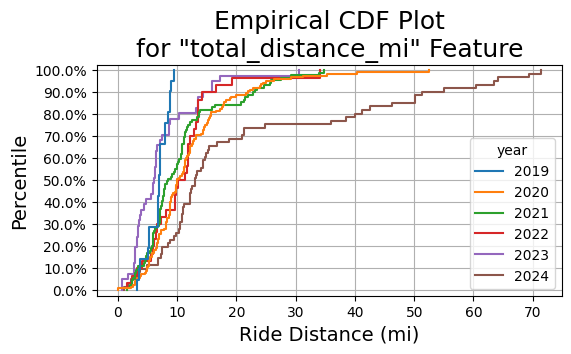

In [22]:
plot_eCDF(df_summary, column='total_distance_mi', xlabel='Ride Distance (mi)', color_by='year')

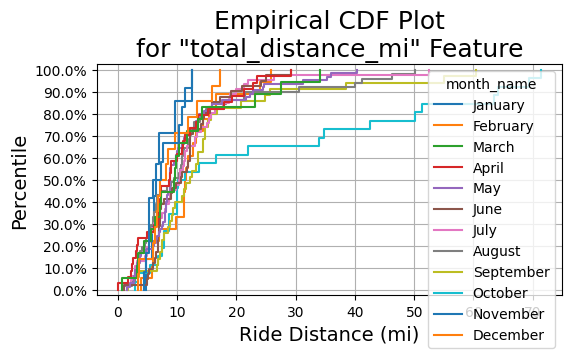

In [23]:
plot_eCDF(df_summary, column='total_distance_mi', xlabel='Ride Distance (mi)', color_by='month_name')

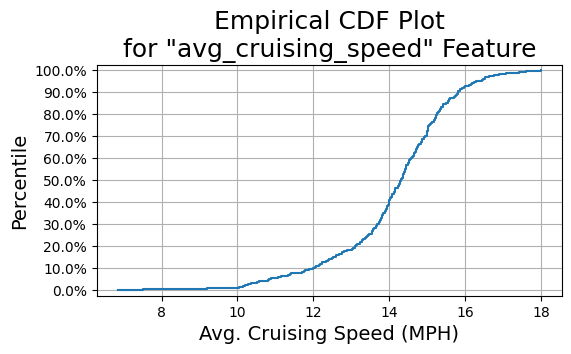

In [24]:
plot_eCDF(df_summary, column='avg_cruising_speed', xlabel='Avg. Cruising Speed (MPH)', color_by=None)

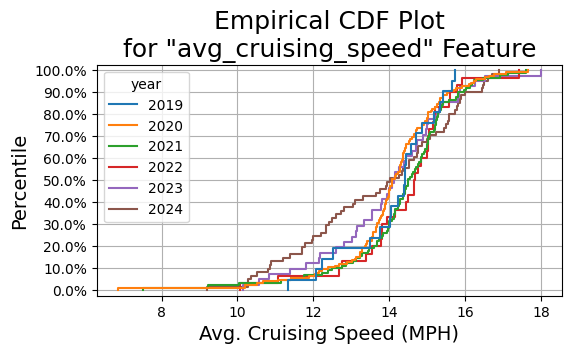

In [25]:
plot_eCDF(df_summary, column='avg_cruising_speed', xlabel='Avg. Cruising Speed (MPH)', color_by='year')

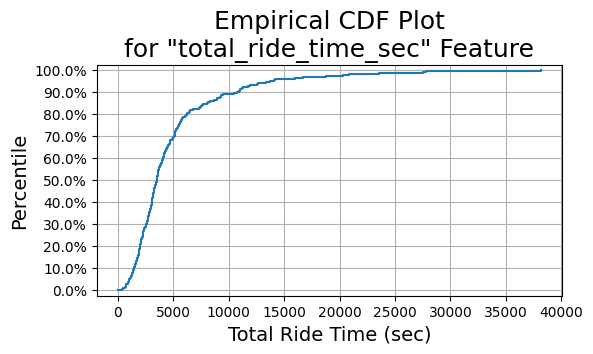

In [26]:
plot_eCDF(df_summary, column='total_ride_time_sec', xlabel='Total Ride Time (sec)', color_by=None)

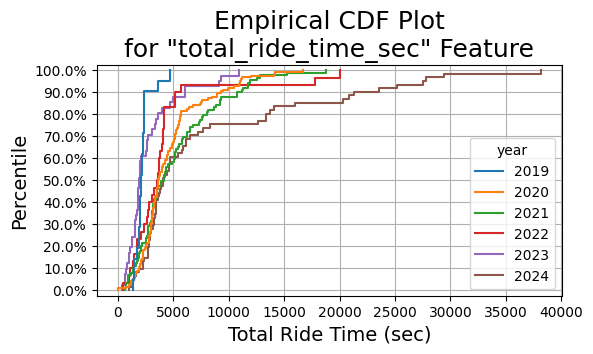

In [27]:
plot_eCDF(df_summary, column='total_ride_time_sec', xlabel='Total Ride Time (sec)', color_by='year')

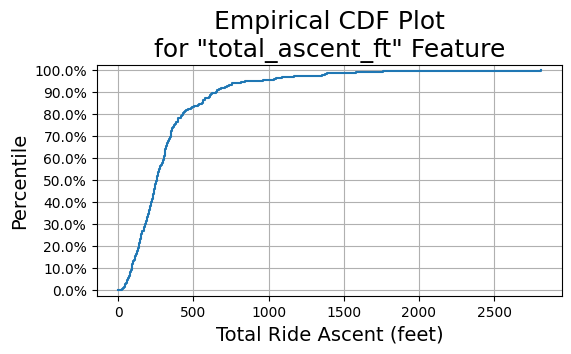

In [28]:
plot_eCDF(df_summary, column='total_ascent_ft', xlabel='Total Ride Ascent (feet)', color_by=None)

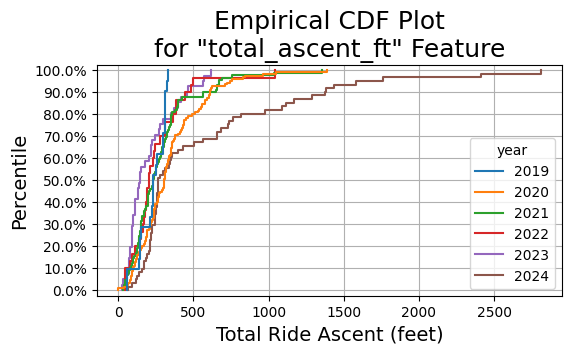

In [29]:
plot_eCDF(df_summary, column='total_ascent_ft', xlabel='Total Ride Ascent (feet)',color_by='year')

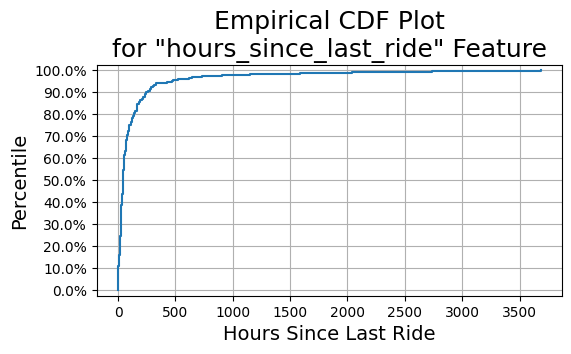

In [30]:
plot_eCDF(df_summary, column='hours_since_last_ride', xlabel='Hours Since Last Ride', color_by=None)

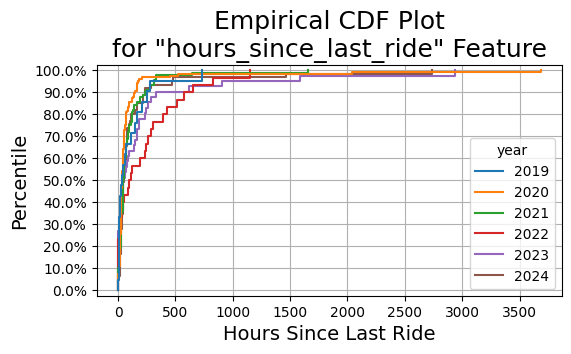

In [31]:
plot_eCDF(df_summary, column='hours_since_last_ride', xlabel='Hours Since Last Ride', color_by='year')

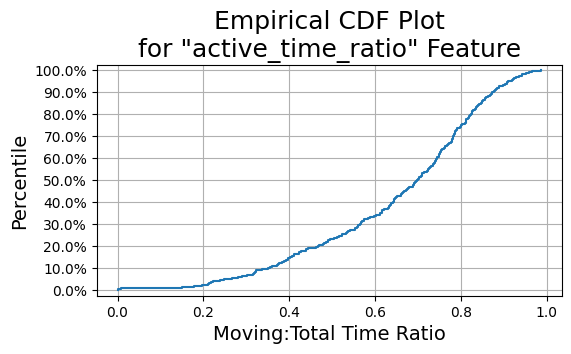

In [32]:
plot_eCDF(df_summary, column='active_time_ratio', xlabel='Moving:Total Time Ratio', color_by=None)

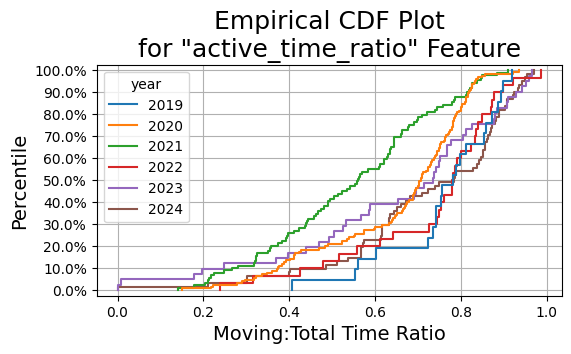

In [33]:
plot_eCDF(df_summary, column='active_time_ratio', xlabel='Moving:Total Time Ratio', color_by='year')

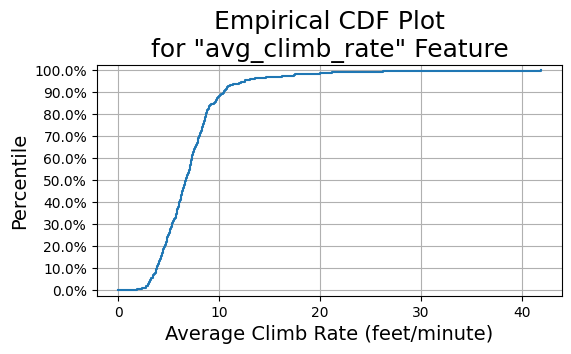

In [34]:
plot_eCDF(df_summary, column='avg_climb_rate', xlabel='Average Climb Rate (feet/minute)', color_by=None)

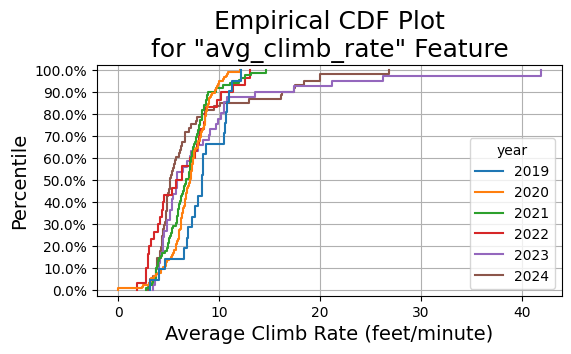

In [35]:
plot_eCDF(df_summary, column='avg_climb_rate', xlabel='Average Climb Rate (feet/minute)', color_by='year')

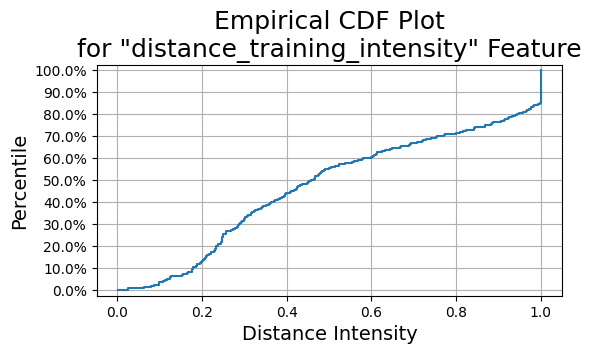

In [36]:
plot_eCDF(df_summary, column='distance_training_intensity', xlabel='Distance Intensity', color_by=None)

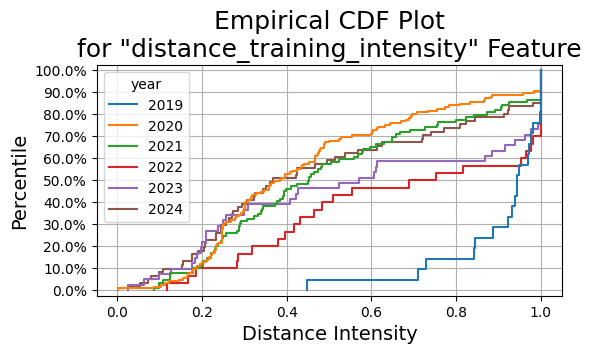

In [37]:
plot_eCDF(df_summary, column='distance_training_intensity', xlabel='Distance Intensity', color_by='year')

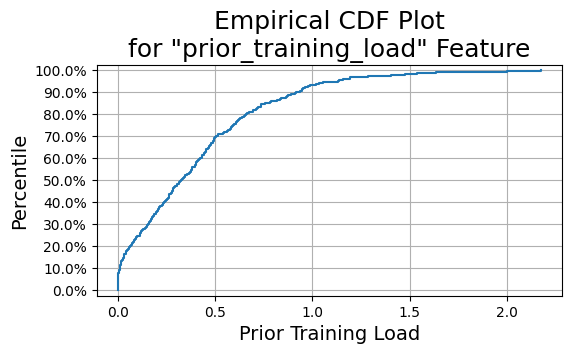

In [38]:
plot_eCDF(df_summary, column='prior_training_load', xlabel='Prior Training Load', color_by=None)

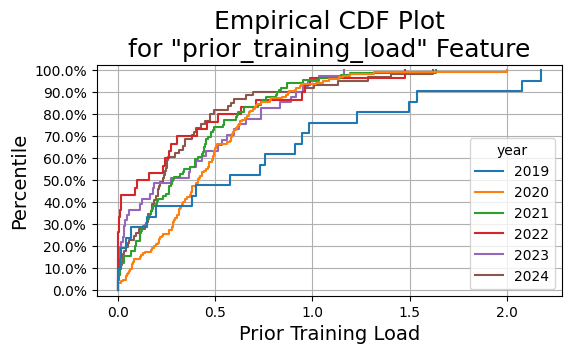

In [39]:
plot_eCDF(df_summary, column='prior_training_load', xlabel='Prior Training Load', color_by='year')

# Save the Feature Engineered Summary

In [42]:
feature_columns = [x for x in df_summary.columns if x not in power_cols]
df_summary = df_summary[feature_columns+power_cols]

In [ ]:
df_summary.to_csv(OUT_CSV_DATA / 'ride_summary_engineered.csv', index=False)